In [76]:
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from colorsys import hsv_to_rgb
#plt.style.use("https://raw.githubusercontent.com/LeonidPilyugin/mpl-style/refs/heads/main/simple.mplstyle")
plt.style.use("https://raw.githubusercontent.com/garrettj403/SciencePlots/refs/heads/master/scienceplots/styles/science.mplstyle")
plt.rcParams["figure.figsize"] = (6, 4)

In [66]:
plot_args = {
    0.7: { "color": hsv_to_rgb(0 / 9, 1, 1) }, #{ "marker": "^", "color": "red" },
    0.8: { "color": hsv_to_rgb(1 / 9, 1, 1) }, #{ "marker": "^", "color": "green" },
    0.9: { "color": hsv_to_rgb(2 / 9, 1, 1) }, #{ "marker": "^", "color": "blue" },
    1.0: { "color": hsv_to_rgb(3 / 9, 1, 1) }, #{ "marker": "s", "color": "red" },
    1.1: { "color": hsv_to_rgb(4 / 9, 1, 1) }, #{ "marker": "s", "color": "green" },
    1.2: { "color": hsv_to_rgb(5 / 9, 1, 1) }, #{ "marker": "s", "color": "blue" },
    1.3: { "color": hsv_to_rgb(6 / 9, 1, 1) }, #{ "marker": "o", "color": "red" },
    1.4: { "color": hsv_to_rgb(7 / 9, 1, 1) }, #{ "marker": "o", "color": "green" },
    1.5: { "color": hsv_to_rgb(8 / 9, 1, 1) }, #{ "marker": "o", "color": "blue" },
}

plot_args

{0.7: {'color': (1, 0.0, 0.0)},
 0.8: {'color': (1, 0.6666666666666666, 0.0)},
 0.9: {'color': (0.6666666666666667, 1, 0.0)},
 1.0: {'color': (0.0, 1, 0.0)},
 1.1: {'color': (0.0, 1, 0.6666666666666665)},
 1.2: {'color': (0.0, 0.6666666666666665, 1)},
 1.3: {'color': (0.0, 0.0, 1)},
 1.4: {'color': (0.666666666666667, 0.0, 1)},
 1.5: {'color': (1, 0.0, 0.666666666666667)}}

In [59]:
results = {}
for path in Path("data").glob("*"):
    df = pd.read_csv(path)
    nvac = df["true_nvac"].mean()
    he = float(path.stem.split("-")[-1])
    r = df["r_best"].mean()
    max_error = abs((df["vac_with_best"] - df["true_nvac"]).max())
    mean_error = abs((df["vac_with_best"] - df["true_nvac"]).mean())

    if he not in results:
        results[he] = {
            "r": [],
            "max_error": [],
            "mean_error": [],
            "nvac": [],
        }

    results[he]["r"].append(r)
    results[he]["nvac"].append(nvac)
    results[he]["max_error"].append(max_error)
    results[he]["mean_error"].append(mean_error)
    

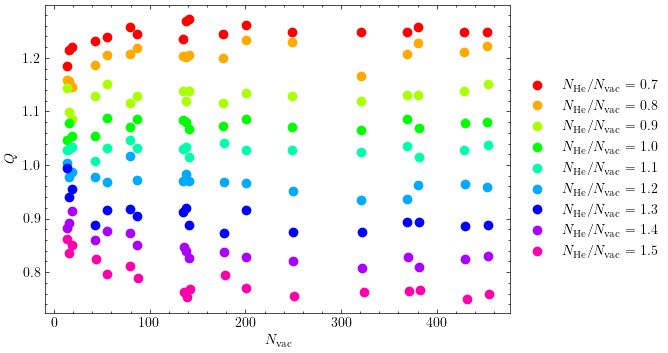

In [118]:
for k in [ 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5 ]:
    v = results[k]
    plt.plot(v["nvac"], v["r"], 'o', label=f"$N_\\text{{He}}/N_\\text{{vac}}$ = {k}", **plot_args[k])
plt.xlabel("$N_\\text{vac}$")
plt.ylabel("$Q$")
plt.legend(bbox_to_anchor=(1.0, 0.8))
plt.savefig("plot1.png")
plt.savefig("plot1.pdf")

In [105]:
x = np.asarray(list(results.keys()))
ys = [[v["r"][v["nvac"].index(sorted(v["nvac"])[i])] for k, v in results.items()] for i in range(len(results[0.7]["nvac"]))]
nvac = [np.mean([sorted(v["nvac"])[i] for k, v in results.items()]) for i in range(len(ys))]

nvac_pa = [ {
    "color": hsv_to_rgb(i / len(nvac), 1, 1),
    "label": f"$N_\\text{{vac}} = {int(n)}$",
} for i, n in enumerate(nvac)]

len(nvac)

18

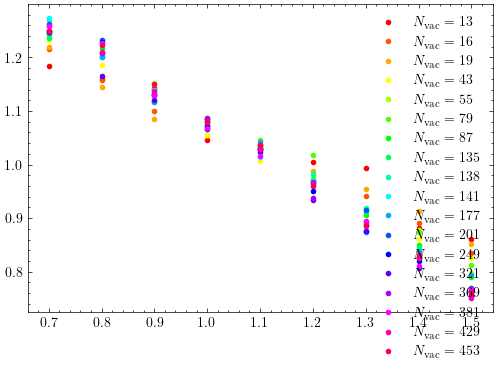

In [106]:
for i, n in enumerate(nvac):
    plt.plot(x, ys[i], '.', **nvac_pa[i])
plt.legend()

In [112]:
ks = results.keys()
rs = []
for k, v in results.items():
    vv = np.asarray(v["r"])
    rs.append(np.mean(vv[np.asarray(v["nvac"]) > 100]))

-0.6158866761363637 1.69358723532197


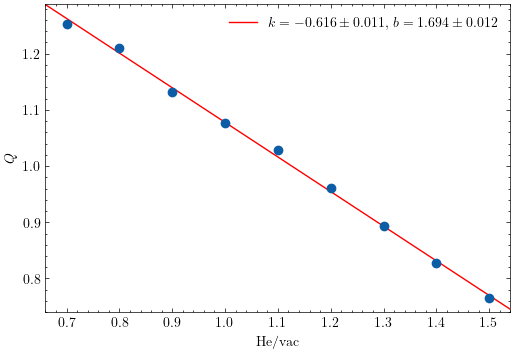

In [121]:
x = np.asarray(list(ks))
y = np.asarray(rs)

k, b = np.polyfit(x, y, 1)

k_err = np.sqrt(1 / (len(x) - 2) * ((np.mean(y**2) - np.mean(y) ** 2) / (np.mean(x**2) - np.mean(x)**2) - k ** 2))
b_err = k_err * np.sqrt(np.mean(x**2))

plt.axline((x[0], x[0] * k + b), (x[1], x[1] * k + b), color="red", label=f"$k={k:.3f} \\pm {k_err:.3f}$, $b={b:.3f} \\pm {b_err:.3f}$")
plt.plot(x, y, 'o')
plt.xlabel("He/vac")
plt.ylabel("$Q$")
plt.legend()
plt.savefig("plot2.png")
plt.savefig("plot2.pdf")

print(k, b)

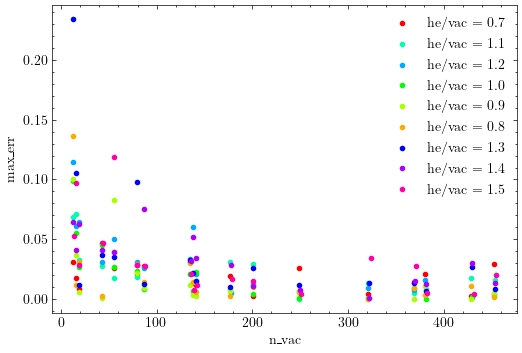

In [79]:
for k, v in results.items():
    plt.plot(v["nvac"], np.asarray(v["max_error"]) / np.asarray(v["nvac"]), '.', label=f"he/vac = {k}", **plot_args[k])
plt.xlabel("n_vac")
plt.ylabel("max_err")
plt.legend()
plt.savefig("plot3.png")